In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

X_test = pd.read_pickle("X_test.pickle")
y_test = pd.read_pickle("y_test.pickle")
X_test.columns

Index(['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'p_dep', 'Rate',
       'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay', 'insurance',
       'financial', 'e_type_FT', 'e_type_PE', 'e_type_PT', 'benefit_-1',
       'benefit_Blue', 'benefit_Grey', 'benefit_Red', 'benefit_Yellow',
       'Time_1', 'Time_2', 'Time_3', 'Time_4', 'Time_5', 'Time_6',
       'p_grade_-1', 'p_grade_0', 'p_grade_1', 'p_grade_2', 'p_grade_3',
       'p_grade_4', 'p_grade_5', 'p_grade_6', 'p_grade_7', 'p_grade_8',
       'p_grade_9', 'p_grade_A', 'p_grade_B', 'p_grade_C', 'p_grade_D',
       'p_grade_E', 'p_grade_F', 'p_grade_G', 'p_grade_H', 'p_grade_J',
       'p_grade_L', 'p_grade_M', 'p_grade_N', 'p_grade_S', 'p_grade_T',
       'p_grade_V', 'p_grade_X', 'p_grade_Y', 'p_grade_Z'],
      dtype='object')

In [2]:
import pickle
model = pickle.load(open("prediction_model.pickle", 'rb'))

In [3]:
synthesis_data = pd.read_csv("./Data synthesis/synthesis_data_withsalry.csv")

In [4]:
synthesis_data = synthesis_data.drop('Unnamed: 0',axis=1)

In [5]:
synthesis_data.columns

Index(['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'Time', 'p_dep',
       'e_type', 'Rate', 'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay',
       'p_grade', 'insurance', 'benefit', 'financial', 'Salary'],
      dtype='object')

In [6]:
select_cols = [col for col in synthesis_data.columns if col not in ['Time', 'e_type', 'p_grade', 'benefit',"Salary"]]
select_cols

['Total Payments',
 'Lump Sum Pay',
 'Other Pay (Payroll Explorer)',
 'FMS Department',
 'Job Class',
 'Average Benefit Cost',
 'p_dep',
 'Rate',
 'p_bonus',
 't_bonus',
 'o_pay',
 'long',
 'e_pay',
 'insurance',
 'financial']

In [7]:
# Read the synthesised data and save it as X_train and y_train
X_train = synthesis_data[synthesis_data.columns[:-1]]
y_train = synthesis_data[synthesis_data.columns[-1]]
X_train.shape
X_train.columns

Index(['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'Time', 'p_dep',
       'e_type', 'Rate', 'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay',
       'p_grade', 'insurance', 'benefit', 'financial'],
      dtype='object')

In [8]:
X_train = X_train[select_cols]
X_train.columns

Index(['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'p_dep', 'Rate',
       'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay', 'insurance',
       'financial'],
      dtype='object')

In [9]:
X_test = X_test[select_cols]
X_test.columns

Index(['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'p_dep', 'Rate',
       'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay', 'insurance',
       'financial'],
      dtype='object')

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
def model_eval(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """PyML P477-480
    Plot residual plot , dots should be located around the 0 line, and have no pattern
    R_square should be close to 1
    MSE should be small
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
    print("R2",model.score(X_train, y_train))
    print("R2 Adj",1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print('MSE train: %.3f, test: %.3f' %(mse_train, mse_test))
    print('Over fitting' if mse_train < mse_test else 'Under fitting')
    
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    #plt.hlines(y=0, xmin=-10, xmax=350000,color='black', lw=2)
    plt.show()
    


R^2 train: 1.000, test: 0.066
R2 0.999999995297684
R2 Adj 0.9999999952975959
MSE train: 7.986, test: 1615391012.126
Over fitting


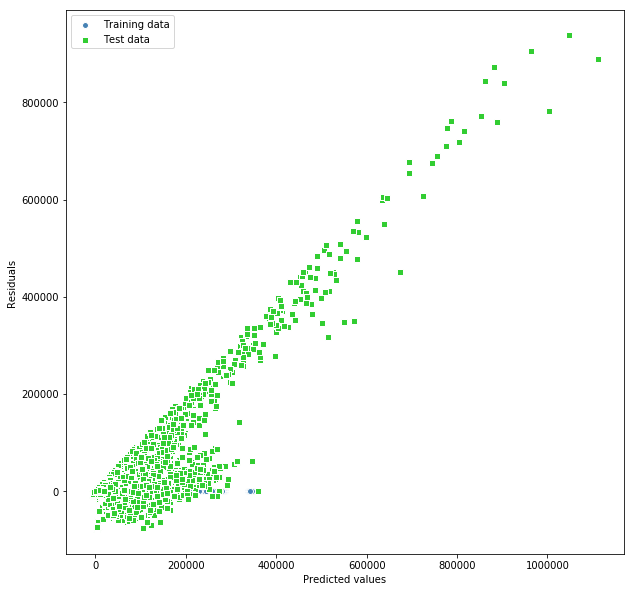

In [11]:
slr.fit(X_train, y_train)
model_eval(slr)